### Model Training

#### 1.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor 

import warnings
warnings.filterwarnings("ignore")

### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("data/stud.csv")

### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [4]:
X = df.drop("math_score",axis=1)
y = df["math_score"]

In [5]:
for i in df.columns[:-3]:
    print()
    print(f"{i}:{df[i].unique()}")


gender:['female' 'male']

race_ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']

parental_level_of_education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch:['standard' 'free/reduced']

test_preparation_course:['none' 'completed']


In [6]:
numerical_features = X.select_dtypes(exclude="object").columns
numerical_features

Index(['reading_score', 'writing_score'], dtype='object')

In [7]:
categorical_features = X.select_dtypes(include="object").columns
categorical_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [8]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
        transformers = [
            ("ohe",cat_transformer,categorical_features),
            ("sc",num_transformer,numerical_features)
        ],remainder="passthrough"
)

In [9]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Create an Evaluate Function to give all metrics after model Training

In [11]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)
    return mae,mse,rmse,r2

In [12]:
models = {
    "Linear Regression":LinearRegression(),
    "Decision Tree":DecisionTreeRegressor(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "Adaboost":AdaBoostRegressor(),
    "Random Forest":RandomForestRegressor(),
    "K-Neighbors": KNeighborsRegressor(),

}

In [13]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    
    print('Model performance for Training set')
    print("- Mean squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print(f"- R2 Score: {model_train_r2}")
    
    print()
    
    print('Model performance for Testing set')
    print("- Mean squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print(f"- R2 Score: {model_test_r2}")
    r2_list.append(model_test_r2)
    

Linear Regression
Model performance for Training set
- Mean squared Error: 28.3514
- Root Mean Squared Error: 5.3246
- Mean Absolute Error: 4.2680
- R2 Score: 0.8742438818395085

Model performance for Testing set
- Mean squared Error: 29.1319
- Root Mean Squared Error: 5.3974
- Mean Absolute Error: 4.2169
- R2 Score: 0.8802823406148662
Decision Tree
Model performance for Training set
- Mean squared Error: 0.0781
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9996534669718089

Model performance for Testing set
- Mean squared Error: 60.4750
- Root Mean Squared Error: 7.7766
- Mean Absolute Error: 6.1950
- R2 Score: 0.7514777774490176
Lasso
Model performance for Training set
- Mean squared Error: 43.4784
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071462015863456

Model performance for Testing set
- Mean squared Error: 42.5064
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253197323627853
Rid

In [14]:
pd.DataFrame({"model":model_list,"r2_score":r2_list}).sort_values(by=["r2_score"],ascending=False)

,model,r2_score
3,Ridge,0.880593
0,Linear Regression,0.880282
5,Random Forest,0.852974
4,Adaboost,0.845619
2,Lasso,0.825320
6,K-Neighbors,0.783193
1,Decision Tree,0.751478


### Linear Regression

In [15]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

score = r2_score(y_test,y_pred)
score

0.8802823406148662

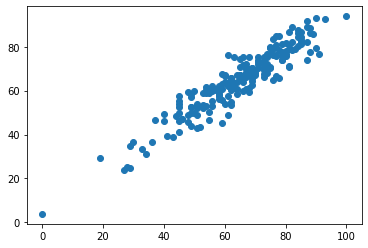

In [16]:
plt.scatter(y_test,y_pred)

<AxesSubplot:xlabel='math_score'>

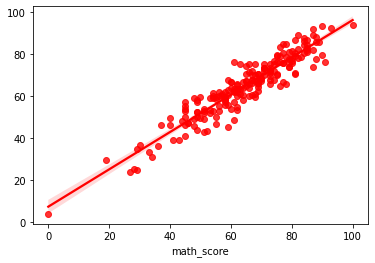

In [17]:
sns.regplot(y_test,y_pred,color="red")

In [18]:
pd.DataFrame({"original":y_test,"predicted":y_pred,"difference":y_test-y_pred})

,original,predicted,difference
521,91,76.531250,14.468750
737,53,58.921875,-5.921875
740,80,76.914062,3.085938
660,74,76.734375,-2.734375
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.531250,8.468750
332,62,62.039062,-0.039062
208,74,67.945312,6.054688
613,65,67.164062,-2.164062
